In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load datasets
matches_df = pd.read_csv('/content/matches.csv')
deliveries_df = pd.read_csv('/content/deliveries.csv')

# Display basic info
print("🔹 Matches Dataset Info:")
print(matches_df.info(), "\n")

print("🔹 Deliveries Dataset Info:")
print(deliveries_df.info(), "\n")

# Check for missing values
print("🔍 Missing Values in Matches Dataset:\n", matches_df.isnull().sum(), "\n")
print("🔍 Missing Values in Deliveries Dataset:\n", deliveries_df.isnull().sum(), "\n")

# Check for duplicates
print("✅ Duplicate Rows in Matches Dataset:", matches_df.duplicated().sum())
print("✅ Duplicate Rows in Deliveries Dataset:", deliveries_df.duplicated().sum())


🔹 Matches Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   obj

In [9]:
# Remove duplicate rows if present
matches_df.drop_duplicates(inplace=True)
deliveries_df.drop_duplicates(inplace=True)

# Fill missing values in 'umpire' and 'player_of_match' columns with 'Unknown'
matches_df.fillna({'umpire1': 'Unknown', 'umpire2': 'Unknown', 'player_of_match': 'Unknown'}, inplace=True)

# Fill any missing values in numerical columns with 0
matches_df.fillna(0, inplace=True)
deliveries_df.fillna(0, inplace=True)

# Verify changes
print("✅ Missing Values After Cleaning in Matches Dataset:\n", matches_df.isnull().sum(), "\n")
print("✅ Missing Values After Cleaning in Deliveries Dataset:\n", deliveries_df.isnull().sum(), "\n")


✅ Missing Values After Cleaning in Matches Dataset:
 id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64 

✅ Missing Values After Cleaning in Deliveries Dataset:
 match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64 



<ipython-input-11-c6a00ce689c7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Team', x='Matches Played', data=team_performance.sort_values(by='Matches Played', ascending=False), palette='Blues_r')
<ipython-input-11-c6a00ce689c7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Team', x='Win Percentage', data=team_performance.sort_values(by='Win Percentage', ascending=False), palette='Greens_r')


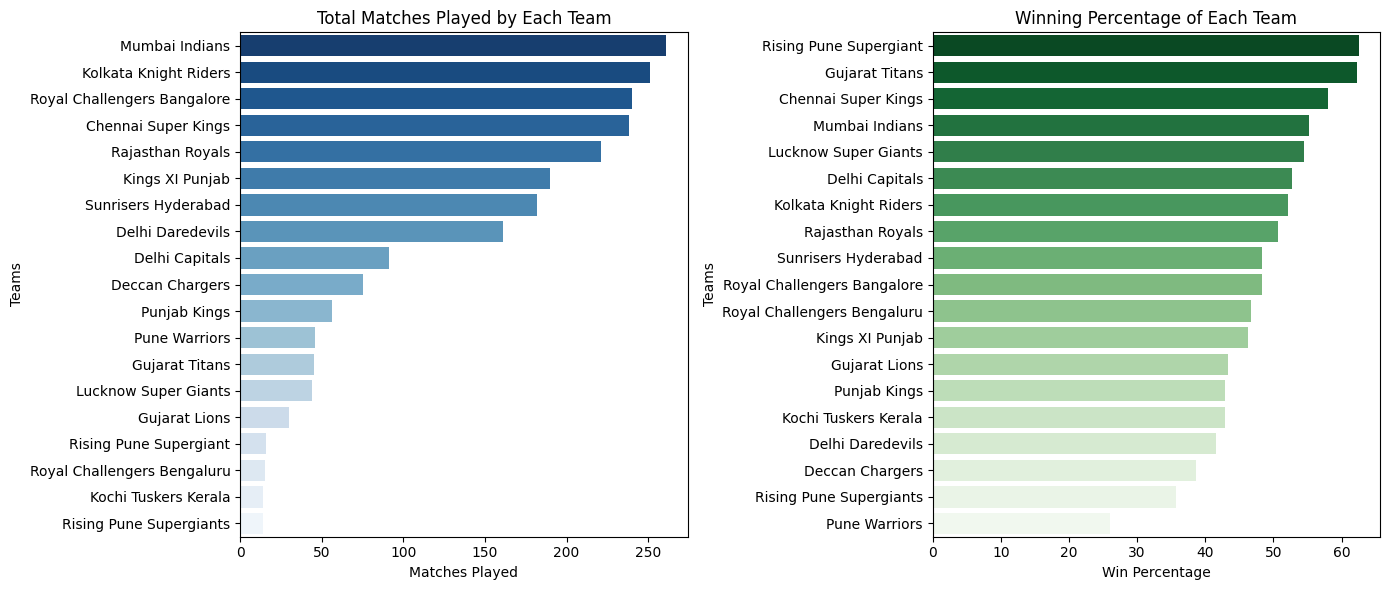

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count matches played by each team
matches_played = pd.concat([matches_df['team1'], matches_df['team2']]).value_counts()

# Count wins by each team (fill missing values with 0)
wins = matches_df['winner'].value_counts().reindex(matches_played.index, fill_value=0)

# Calculate winning percentage
win_percentage = (wins / matches_played) * 100

# Create DataFrame for visualization
team_performance = pd.DataFrame({'Team': matches_played.index, 'Matches Played': matches_played.values, 'Win Percentage': win_percentage.values})

# Plot Matches Played & Win Percentage
plt.figure(figsize=(14, 6))

# Matches Played
plt.subplot(1, 2, 1)
sns.barplot(y='Team', x='Matches Played', data=team_performance.sort_values(by='Matches Played', ascending=False), palette='Blues_r')
plt.xlabel("Matches Played")
plt.ylabel("Teams")
plt.title("Total Matches Played by Each Team")

# Win Percentage
plt.subplot(1, 2, 2)
sns.barplot(y='Team', x='Win Percentage', data=team_performance.sort_values(by='Win Percentage', ascending=False), palette='Greens_r')
plt.xlabel("Win Percentage")
plt.ylabel("Teams")
plt.title("Winning Percentage of Each Team")

plt.tight_layout()
plt.show()


<ipython-input-12-9d84aba754dc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Highest Score', y='batting_team', data=team_score_stats.sort_values(by='Highest Score', ascending=False), palette='Blues_r')
<ipython-input-12-9d84aba754dc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lowest Score', y='batting_team', data=team_score_stats.sort_values(by='Lowest Score', ascending=True), palette='Reds_r')


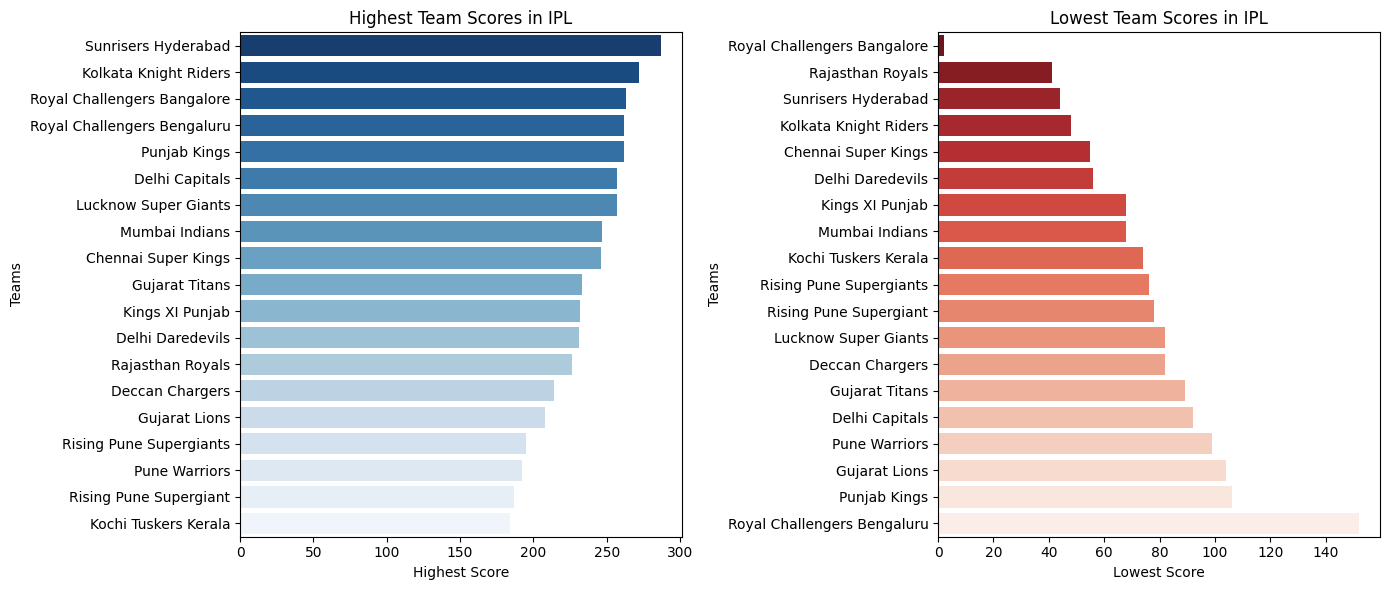

In [12]:
# Aggregate total score per match for each team
team_scores = deliveries_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Calculate highest and lowest scores per team
highest_scores = team_scores.groupby('batting_team')['total_runs'].max()
lowest_scores = team_scores.groupby('batting_team')['total_runs'].min()

# Create DataFrame for visualization
team_score_stats = pd.DataFrame({'Highest Score': highest_scores, 'Lowest Score': lowest_scores}).reset_index()

# Plot Highest & Lowest Scores
plt.figure(figsize=(14, 6))

# Highest Score Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Highest Score', y='batting_team', data=team_score_stats.sort_values(by='Highest Score', ascending=False), palette='Blues_r')
plt.xlabel("Highest Score")
plt.ylabel("Teams")
plt.title("Highest Team Scores in IPL")

# Lowest Score Plot
plt.subplot(1, 2, 2)
sns.barplot(x='Lowest Score', y='batting_team', data=team_score_stats.sort_values(by='Lowest Score', ascending=True), palette='Reds_r')
plt.xlabel("Lowest Score")
plt.ylabel("Teams")
plt.title("Lowest Team Scores in IPL")

plt.tight_layout()
plt.show()


<ipython-input-13-fb2935c830de>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total 4s', y='batting_team', data=team_boundaries.sort_values(by='Total 4s', ascending=False), palette='Blues_r')
<ipython-input-13-fb2935c830de>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total 6s', y='batting_team', data=team_boundaries.sort_values(by='Total 6s', ascending=False), palette='Reds_r')


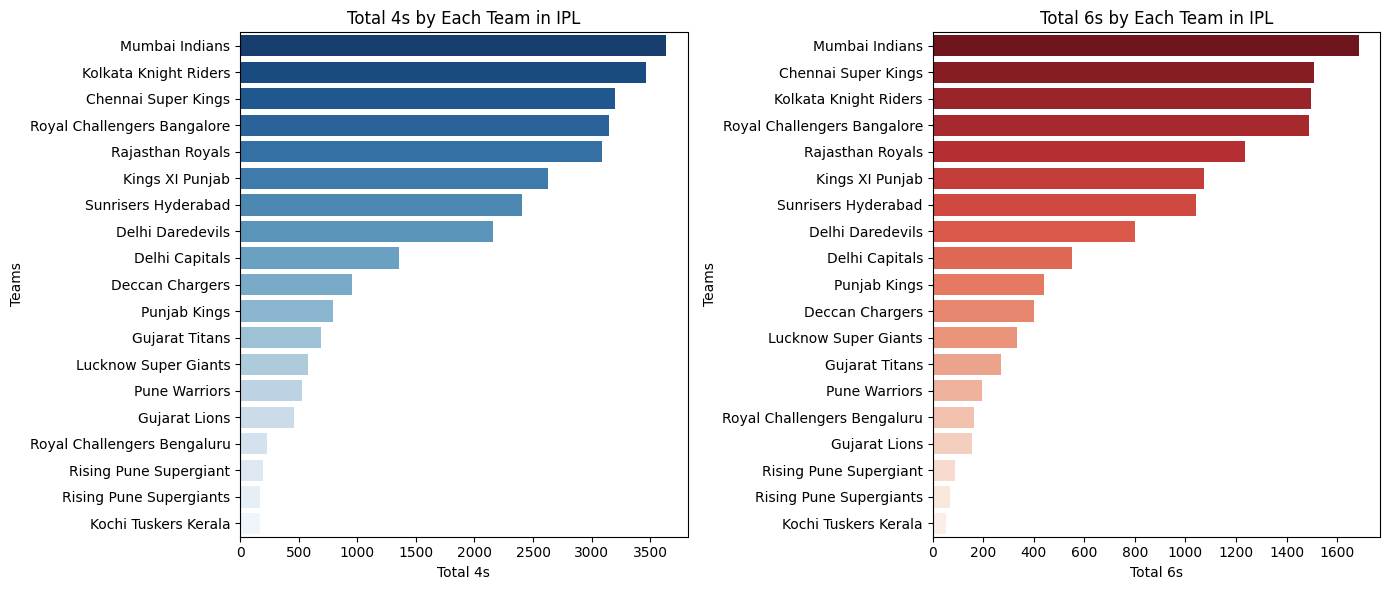

In [13]:
# Count number of 4s hit by each team
fours = deliveries_df[deliveries_df['batsman_runs'] == 4].groupby('batting_team')['batsman_runs'].count()

# Count number of 6s hit by each team
sixes = deliveries_df[deliveries_df['batsman_runs'] == 6].groupby('batting_team')['batsman_runs'].count()

# Create DataFrame for visualization
team_boundaries = pd.DataFrame({'Total 4s': fours, 'Total 6s': sixes}).reset_index()

# Plot Total 4s & 6s
plt.figure(figsize=(14, 6))

# Total 4s Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Total 4s', y='batting_team', data=team_boundaries.sort_values(by='Total 4s', ascending=False), palette='Blues_r')
plt.xlabel("Total 4s")
plt.ylabel("Teams")
plt.title("Total 4s by Each Team in IPL")

# Total 6s Plot
plt.subplot(1, 2, 2)
sns.barplot(x='Total 6s', y='batting_team', data=team_boundaries.sort_values(by='Total 6s', ascending=False), palette='Reds_r')
plt.xlabel("Total 6s")
plt.ylabel("Teams")
plt.title("Total 6s by Each Team in IPL")

plt.tight_layout()
plt.show()


<ipython-input-15-d5a95f15d69b>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Powerplay Score', y='Team', data=team_overs_scores.sort_values(by='Avg Powerplay Score', ascending=False), palette='Blues_r')
<ipython-input-15-d5a95f15d69b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Death Overs Score', y='Team', data=team_overs_scores.sort_values(by='Avg Death Overs Score', ascending=False), palette='Reds_r')


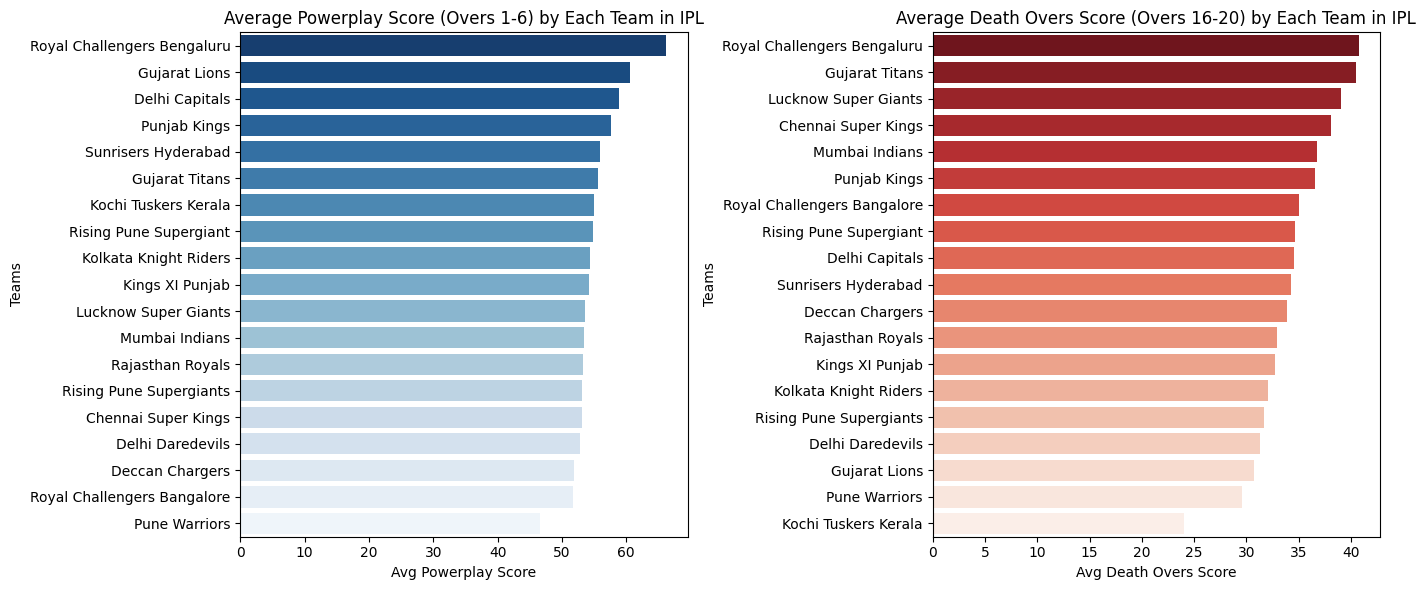

In [15]:
# Define Powerplay (Overs 1-6) and Death Overs (Overs 16-20)
powerplay_scores = deliveries_df[deliveries_df['over'] <= 6].groupby('batting_team')['total_runs'].sum()
death_overs_scores = deliveries_df[deliveries_df['over'] >= 16].groupby('batting_team')['total_runs'].sum()

# Calculate number of matches played by each team
matches_per_team = matches_df['team1'].value_counts().add(matches_df['team2'].value_counts(), fill_value=0)

# Align teams before division to avoid NaN issues
powerplay_scores = powerplay_scores.reindex(matches_per_team.index, fill_value=0)
death_overs_scores = death_overs_scores.reindex(matches_per_team.index, fill_value=0)

# Calculate Average Scores (avoid division by zero)
avg_powerplay_score = powerplay_scores / matches_per_team.replace(0, np.nan)
avg_death_overs_score = death_overs_scores / matches_per_team.replace(0, np.nan)

# Create DataFrame for visualization
team_overs_scores = pd.DataFrame({
    'Team': matches_per_team.index,
    'Avg Powerplay Score': avg_powerplay_score.values,
    'Avg Death Overs Score': avg_death_overs_score.values
})

# Drop NaN values (if any)
team_overs_scores.dropna(inplace=True)

# Convert numeric values to float
team_overs_scores[['Avg Powerplay Score', 'Avg Death Overs Score']] = team_overs_scores[['Avg Powerplay Score', 'Avg Death Overs Score']].astype(float)

# Plot Powerplay & Death Overs Scores
plt.figure(figsize=(14, 6))

# Powerplay Score Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Avg Powerplay Score', y='Team', data=team_overs_scores.sort_values(by='Avg Powerplay Score', ascending=False), palette='Blues_r')
plt.xlabel("Avg Powerplay Score")
plt.ylabel("Teams")
plt.title("Average Powerplay Score (Overs 1-6) by Each Team in IPL")

# Death Overs Score Plot
plt.subplot(1, 2, 2)
sns.barplot(x='Avg Death Overs Score', y='Team', data=team_overs_scores.sort_values(by='Avg Death Overs Score', ascending=False), palette='Reds_r')
plt.xlabel("Avg Death Overs Score")
plt.ylabel("Teams")
plt.title("Average Death Overs Score (Overs 16-20) by Each Team in IPL")

plt.tight_layout()
plt.show()


<ipython-input-16-728620887eff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Powerplay Runs', y='Team', data=team_powerplay_avg, palette='coolwarm')


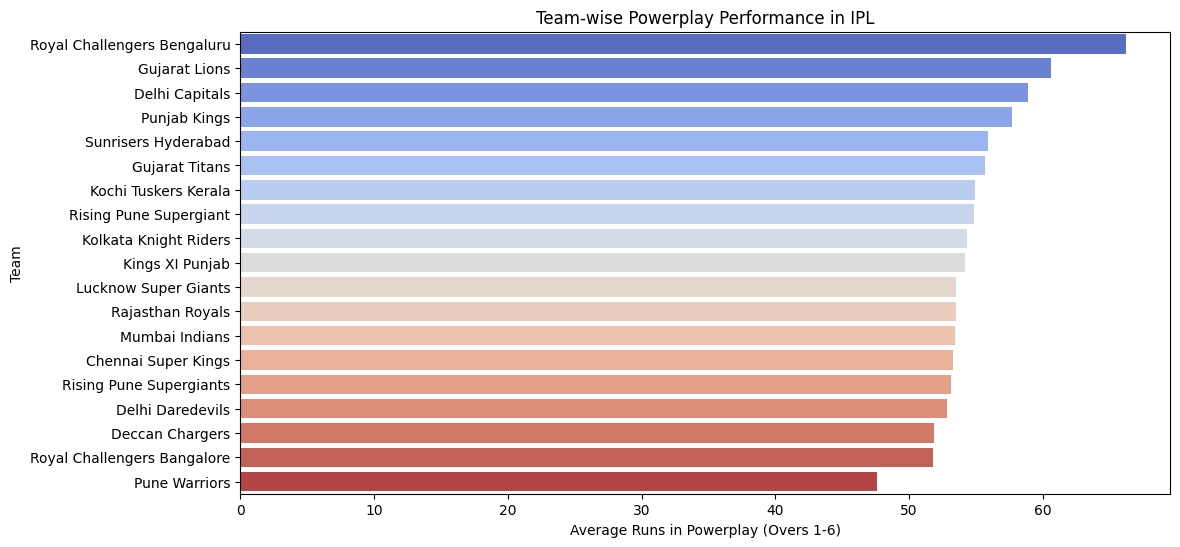

In [16]:
# Grouping by match and team to calculate powerplay runs
powerplay_runs = deliveries_df[deliveries_df['over'] <= 6].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Aggregating for each team
team_powerplay_avg = powerplay_runs.groupby('batting_team')['total_runs'].mean().reset_index()

# Renaming columns
team_powerplay_avg.columns = ['Team', 'Avg Powerplay Runs']

# Sorting by performance
team_powerplay_avg = team_powerplay_avg.sort_values(by='Avg Powerplay Runs', ascending=False)

# Plotting powerplay analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg Powerplay Runs', y='Team', data=team_powerplay_avg, palette='coolwarm')
plt.xlabel("Average Runs in Powerplay (Overs 1-6)")
plt.ylabel("Team")
plt.title("Team-wise Powerplay Performance in IPL")
plt.show()


<ipython-input-20-0bc30663ae2d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman_runs', y='batter', data=top_scorers, palette='viridis')


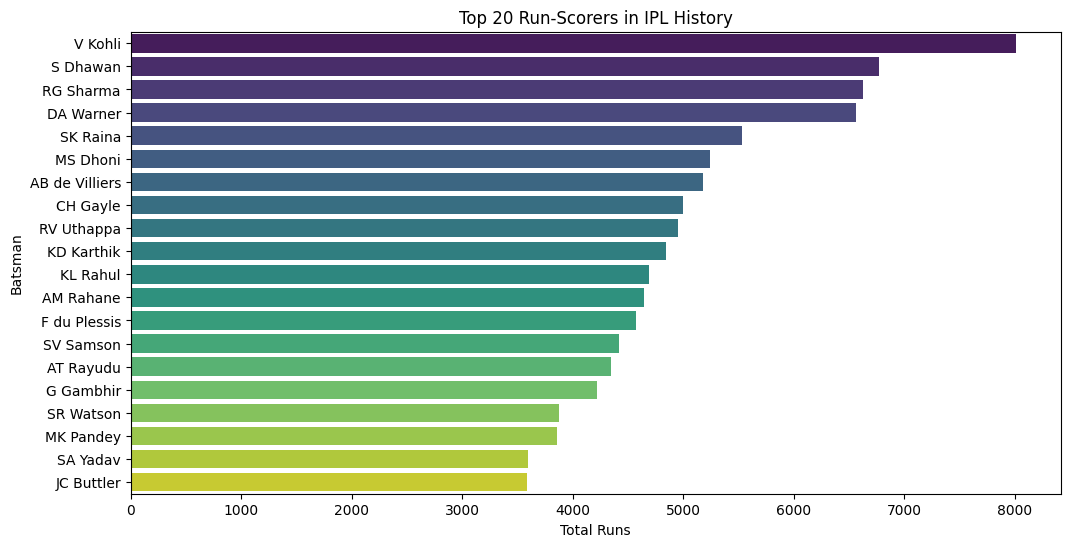

In [20]:
# Aggregate total runs scored by each batter
top_scorers = deliveries_df.groupby('batter')['batsman_runs'].sum().reset_index()

# Sort in descending order to get the top 20 run scorers
top_scorers = top_scorers.sort_values(by='batsman_runs', ascending=False).head(20)

# Plot Top 20 Run-Scorers
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batter', data=top_scorers, palette='viridis')
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.title("Top 20 Run-Scorers in IPL History")
plt.show()


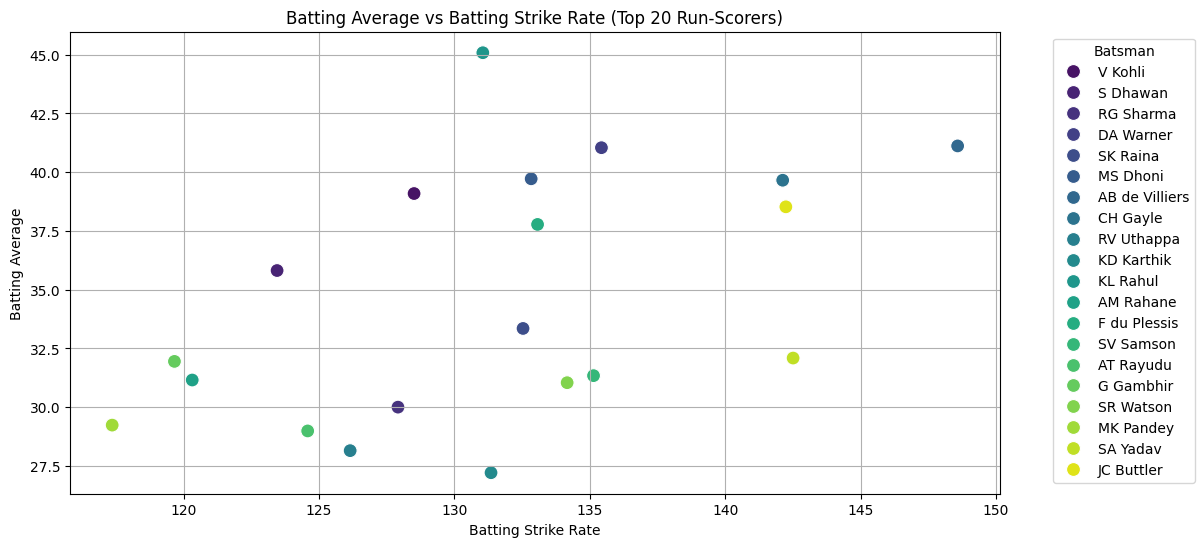

In [21]:
# Filter deliveries dataset for only top 20 batsmen
top_batsmen = top_scorers['batter'].tolist()
top_batsmen_data = deliveries_df[deliveries_df['batter'].isin(top_batsmen)]

# Calculate total balls faced per batsman
balls_faced = top_batsmen_data.groupby('batter')['ball'].count()

# Calculate total dismissals (out) per batsman
dismissals = top_batsmen_data[top_batsmen_data['player_dismissed'].notna()].groupby('player_dismissed').size()

# Merge into the top_scorers DataFrame
top_scorers = top_scorers.set_index('batter')
top_scorers['Balls Faced'] = balls_faced
top_scorers['Dismissals'] = dismissals
top_scorers.fillna(0, inplace=True)  # Fill NaN dismissals with 0 to avoid errors

# Calculate Batting Average and Strike Rate
top_scorers['Batting Average'] = top_scorers['batsman_runs'] / top_scorers['Dismissals'].replace(0, np.nan)
top_scorers['Strike Rate'] = (top_scorers['batsman_runs'] / top_scorers['Balls Faced']) * 100

# Remove players with zero dismissals (to avoid divide by zero)
top_scorers = top_scorers.dropna(subset=['Batting Average'])

# Plot Batting Average vs Strike Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x=top_scorers['Strike Rate'], y=top_scorers['Batting Average'], hue=top_scorers.index, palette='viridis', s=100)
plt.xlabel("Batting Strike Rate")
plt.ylabel("Batting Average")
plt.title("Batting Average vs Batting Strike Rate (Top 20 Run-Scorers)")
plt.legend(title="Batsman", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [22]:
# Count matches played per batsman
batsman_matches = deliveries_df.groupby('batter')['match_id'].nunique()

# Filter players with at least 50 matches
eligible_batsmen = batsman_matches[batsman_matches >= 50].index

# Filter DataFrame for eligible batsmen
filtered_batsmen = top_scorers[top_scorers.index.isin(eligible_batsmen)]

# Identify top players based on Batting Average
top_avg_batsman = filtered_batsmen[['Batting Average']].sort_values(by='Batting Average', ascending=False).head(10)

# Identify top players based on Strike Rate
top_sr_batsman = filtered_batsmen[['Strike Rate']].sort_values(by='Strike Rate', ascending=False).head(10)

# Display results
print("\n🏏 Top 10 Batsmen by Batting Average (Min 50 Matches):")
print(top_avg_batsman)

print("\n⚡ Top 10 Batsmen by Strike Rate (Min 50 Matches):")
print(top_sr_batsman)



🏏 Top 10 Batsmen by Batting Average (Min 50 Matches):
                Batting Average
batter                         
KL Rahul              45.086538
AB de Villiers        41.119048
DA Warner             41.043750
MS Dhoni              39.719697
CH Gayle              39.658730
V Kohli               39.092683
JC Buttler            38.526882
F du Plessis          37.776860
S Dhawan              35.814815
SK Raina              33.349398

⚡ Top 10 Batsmen by Strike Rate (Min 50 Matches):
                Strike Rate
batter                     
AB de Villiers   148.580442
SA Yadav         142.505948
JC Buttler       142.238984
CH Gayle         142.121729
DA Warner        135.429986
SV Samson        135.137615
SR Watson        134.163209
F du Plessis     133.071325
MS Dhoni         132.835065
SK Raina         132.535312


<ipython-input-23-48a61b1487b1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Wickets', y='bowler', data=top_wicket_takers, palette='Reds_r')


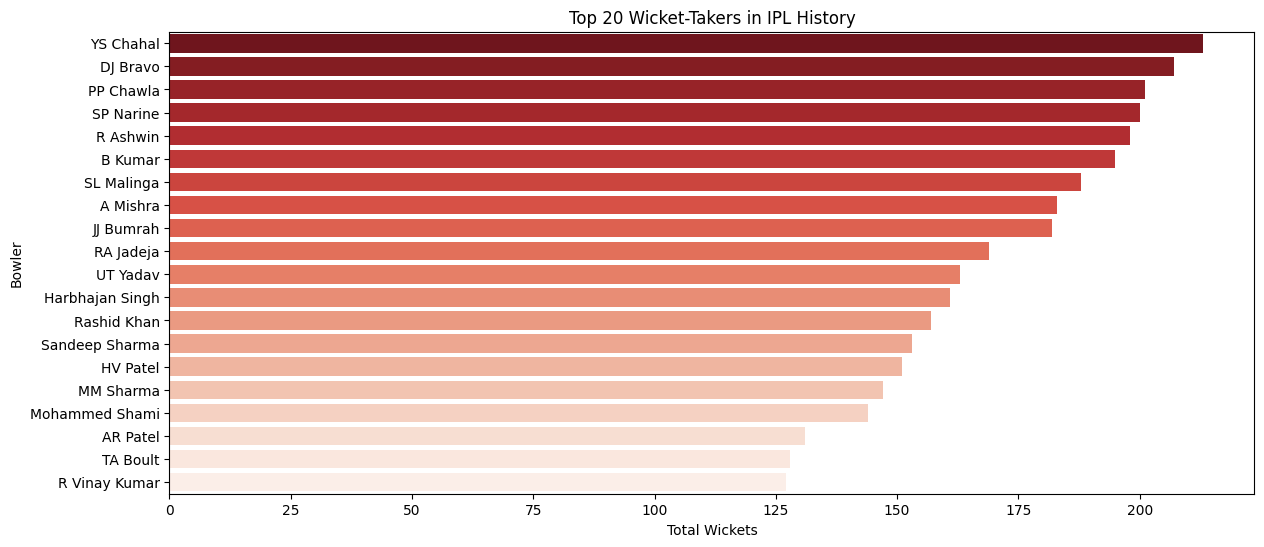

In [23]:
# Filter only wicket-taking deliveries
wicket_deliveries = deliveries_df[deliveries_df['is_wicket'] == 1]

# Count total wickets taken by each bowler
top_wicket_takers = wicket_deliveries.groupby('bowler')['is_wicket'].sum().reset_index()

# Sort by highest wickets
top_wicket_takers = top_wicket_takers.sort_values(by='is_wicket', ascending=False).head(20)

# Rename columns
top_wicket_takers.rename(columns={'is_wicket': 'Total Wickets'}, inplace=True)

# Plot Top Wicket-Takers
plt.figure(figsize=(14, 6))
sns.barplot(x='Total Wickets', y='bowler', data=top_wicket_takers, palette='Reds_r')
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.title("Top 20 Wicket-Takers in IPL History")
plt.show()


<ipython-input-24-78064eb960c9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Runs', y='Batsman', data=top_individual_scores, palette='Purples_r')


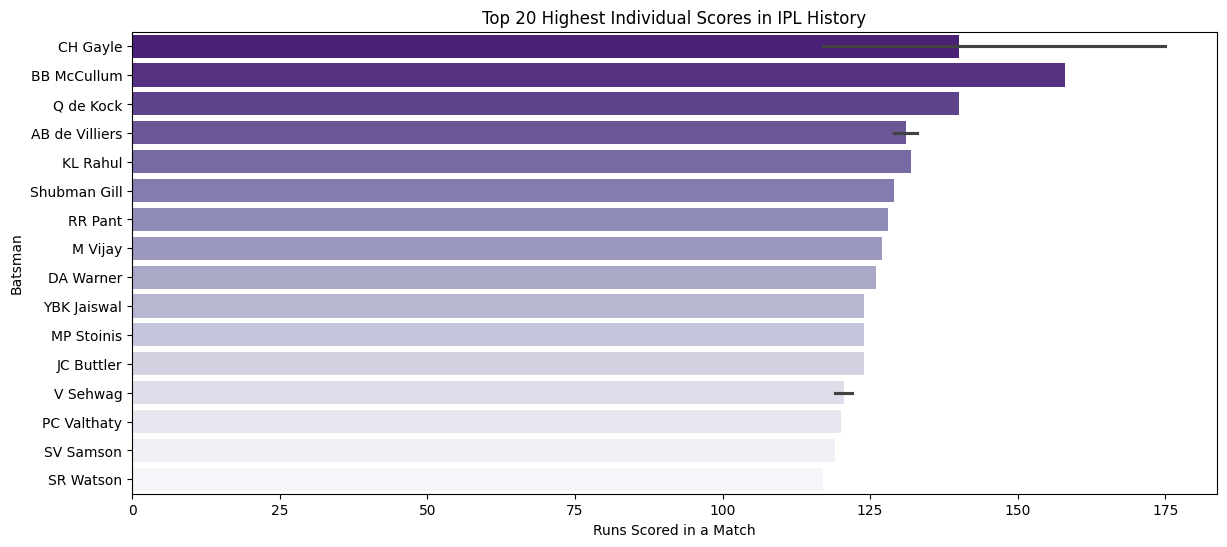

In [24]:
# Get highest individual scores in a match by each batsman
top_individual_scores = deliveries_df.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()

# Sort to get top 20 highest individual scores
top_individual_scores = top_individual_scores.sort_values(by='batsman_runs', ascending=False).head(20)

# Rename columns for better readability
top_individual_scores.rename(columns={'batsman_runs': 'Runs', 'batter': 'Batsman'}, inplace=True)

# Plot Top Individual Batting Scores
plt.figure(figsize=(14, 6))
sns.barplot(x='Runs', y='Batsman', data=top_individual_scores, palette='Purples_r')
plt.xlabel("Runs Scored in a Match")
plt.ylabel("Batsman")
plt.title("Top 20 Highest Individual Scores in IPL History")
plt.show()


<ipython-input-25-83b555b12826>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MOM Awards', y='Player', data=top_mom_players, palette='magma_r')


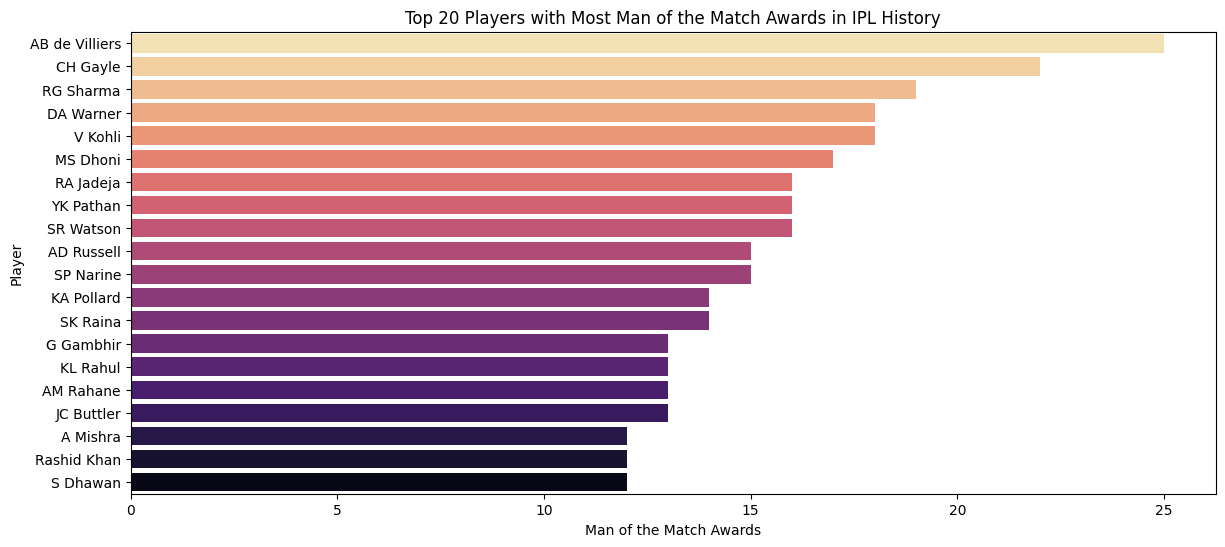

In [25]:
# Count the number of MOM awards for each player
mom_counts = matches_df['player_of_match'].value_counts().reset_index()

# Rename columns for better readability
mom_counts.columns = ['Player', 'MOM Awards']

# Select top 20 players with the most MOM awards
top_mom_players = mom_counts.head(20)

# Plot MOM Count Analysis
plt.figure(figsize=(14, 6))
sns.barplot(x='MOM Awards', y='Player', data=top_mom_players, palette='magma_r')
plt.xlabel("Man of the Match Awards")
plt.ylabel("Player")
plt.title("Top 20 Players with Most Man of the Match Awards in IPL History")
plt.show()


In [27]:
# Check if Batting Average and Economy Rate contain NaNs or non-numeric values
print(player_final_stats[['Batting Average', 'Economy Rate']].dtypes)
print(player_final_stats[['Batting Average', 'Economy Rate']].isnull().sum())

# Convert columns to numeric (if needed)
player_final_stats['Batting Average'] = pd.to_numeric(player_final_stats['Batting Average'], errors='coerce')
player_final_stats['Economy Rate'] = pd.to_numeric(player_final_stats['Economy Rate'], errors='coerce')

# Drop any rows with missing values
player_final_stats.dropna(subset=['Batting Average', 'Economy Rate'], inplace=True)


Batting Average    float64
Economy Rate       float64
dtype: object
Batting Average    0
Economy Rate       0
dtype: int64


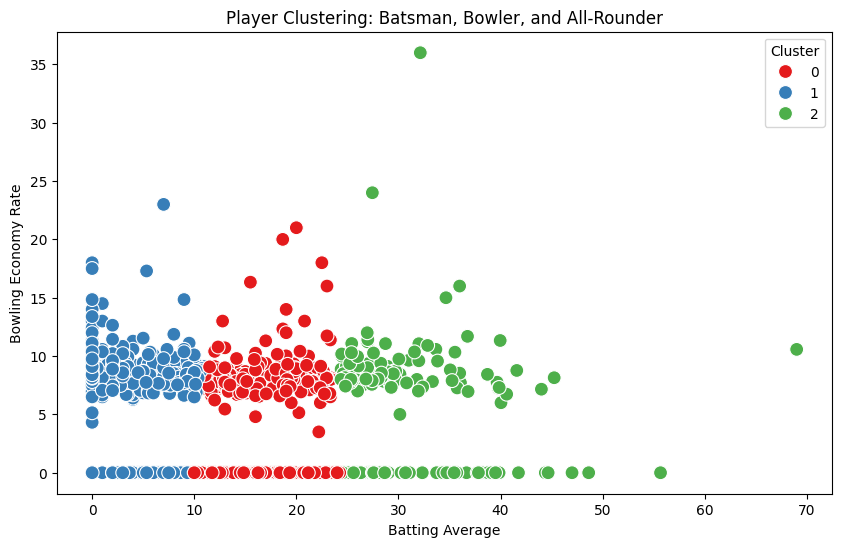

In [28]:
# Step 4: Plot K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_final_stats, x='Batting Average', y='Economy Rate', hue='Cluster', palette='Set1', s=100)
plt.xlabel("Batting Average")
plt.ylabel("Bowling Economy Rate")
plt.title("Player Clustering: Batsman, Bowler, and All-Rounder")
plt.legend(title="Cluster")
plt.show()


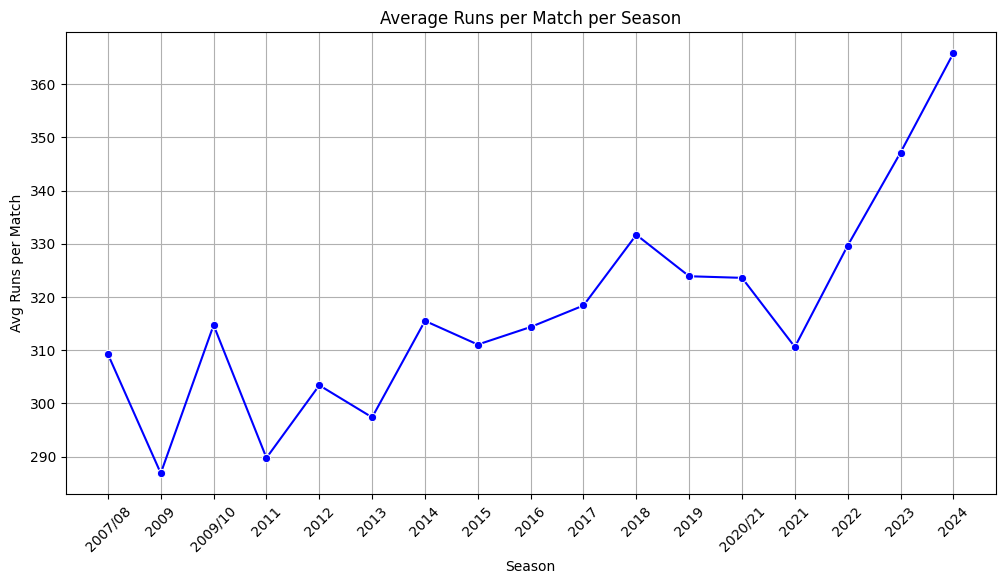

In [30]:
# Merge matches_df with deliveries_df to get season-wise runs
matches_deliveries = pd.merge(deliveries_df, matches_df[['id', 'season']], left_on='match_id', right_on='id')

# Group by season and calculate the average runs per match
seasonal_runs = matches_deliveries.groupby('season')['total_runs'].sum() / matches_deliveries.groupby('season')['match_id'].nunique()

# Plot the trend of average runs per season
plt.figure(figsize=(12, 6))
sns.lineplot(x=seasonal_runs.index, y=seasonal_runs.values, marker='o', color='b')
plt.xlabel("Season")
plt.ylabel("Avg Runs per Match")
plt.title("Average Runs per Match per Season")
plt.xticks(rotation=45)
plt.grid()
plt.show()


<ipython-input-31-1d17864bea6b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_200_scores.index, y=season_200_scores.values, palette="Reds_r")


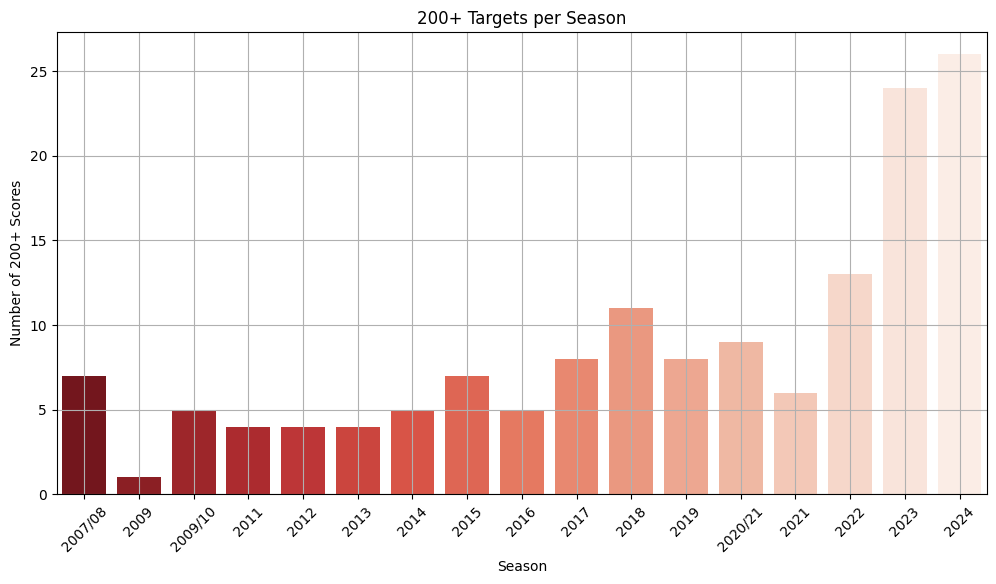

In [31]:
# Filter matches where the first innings score is 200+
high_scores = matches_deliveries[matches_deliveries['inning'] == 1].groupby(['season', 'match_id'])['total_runs'].sum().reset_index()
high_scores_200 = high_scores[high_scores['total_runs'] >= 200]

# Count occurrences of 200+ scores per season
season_200_scores = high_scores_200.groupby('season')['match_id'].count()

# Plot the trend of 200+ scores per season
plt.figure(figsize=(12, 6))
sns.barplot(x=season_200_scores.index, y=season_200_scores.values, palette="Reds_r")
plt.xlabel("Season")
plt.ylabel("Number of 200+ Scores")
plt.title("200+ Targets per Season")
plt.xticks(rotation=45)
plt.grid()
plt.show()


<ipython-input-32-1d312f2e684e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='batsman_runs', data=orange_cap_winners, palette="Blues_r")


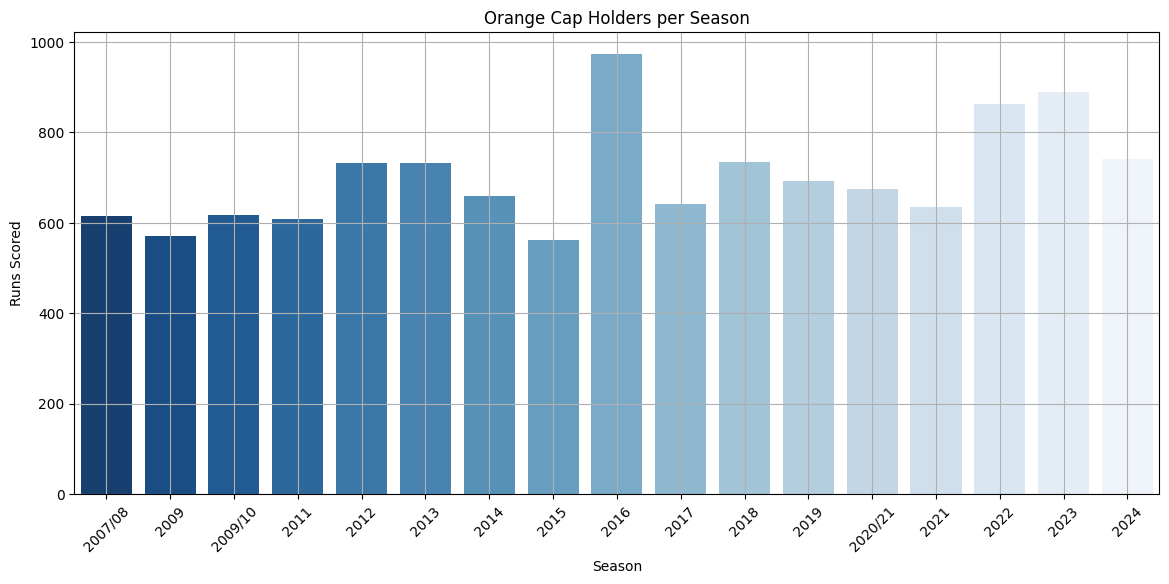

       season         batter  batsman_runs
115   2007/08       SE Marsh           616
229      2009      ML Hayden           572
446   2009/10   SR Tendulkar           618
502      2011       CH Gayle           608
684      2012       CH Gayle           733
910      2013     MEK Hussey           733
1088     2014     RV Uthappa           660
1148     2015      DA Warner           562
1383     2016        V Kohli           973
1422     2017      DA Warner           641
1594     2018  KS Williamson           735
1694     2019      DA Warner           692
1866  2020/21       KL Rahul           676
2051     2021     RD Gaikwad           635
2144     2022     JC Buttler           863
2423     2023   Shubman Gill           890
2606     2024        V Kohli           741


In [32]:
# Group by season and batsman, then sum total runs
orange_cap = matches_deliveries.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

# Find the player with the maximum runs in each season
orange_cap_winners = orange_cap.loc[orange_cap.groupby('season')['batsman_runs'].idxmax()]

# Plot Orange Cap Holders
plt.figure(figsize=(14, 6))
sns.barplot(x='season', y='batsman_runs', data=orange_cap_winners, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Runs Scored")
plt.title("Orange Cap Holders per Season")
plt.grid()
plt.show()

# Display the Orange Cap winners
print(orange_cap_winners[['season', 'batter', 'batsman_runs']])


<ipython-input-36-3afd9479b9c8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='player_dismissed', data=purple_cap_winners, palette="Purples_r")


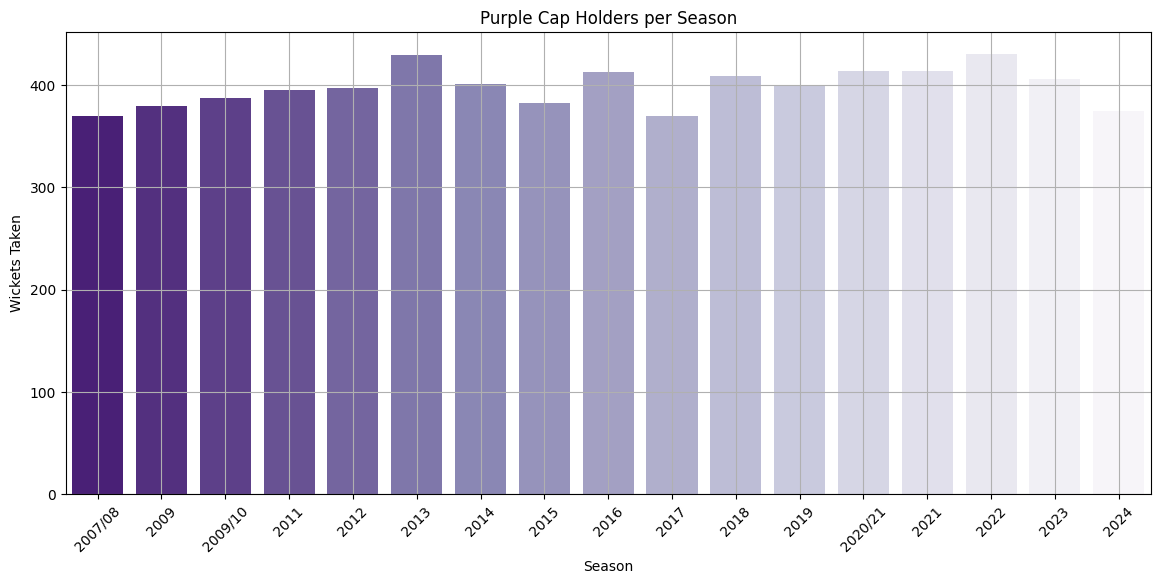

       season             bowler  player_dismissed
51    2007/08            MS Gony               370
174      2009           RP Singh               379
210   2009/10           A Kumble               387
447      2011         SL Malinga               395
554      2012           R Ashwin               397
640      2013    Harbhajan Singh               429
732      2014           AR Patel               401
830      2015            A Nehra               382
938      2016            B Kumar               413
1076     2017          JJ Bumrah               370
1215     2018        Rashid Khan               409
1257     2019          DL Chahar               400
1381  2020/21           K Rabada               414
1456     2021           CV Varun               414
1607     2022  M Prasidh Krishna               430
1782     2023        Rashid Khan               406
1895     2024         PJ Cummins               375


In [36]:
# Merge deliveries_df with matches_df to get the 'season' column
deliveries_with_season = deliveries_df.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Filter out dismissals where a bowler is credited for the wicket (excluding run-outs)
valid_dismissals = deliveries_with_season[deliveries_with_season['player_dismissed'].notna()]
valid_dismissals = valid_dismissals[valid_dismissals['dismissal_kind'] != 'run out']

# Group by season and bowler, then count wickets
purple_cap = valid_dismissals.groupby(['season', 'bowler'])['player_dismissed'].count().reset_index()

# Find the player with the maximum wickets in each season
purple_cap_winners = purple_cap.loc[purple_cap.groupby('season')['player_dismissed'].idxmax()]

# Plot Purple Cap Holders
plt.figure(figsize=(14, 6))
sns.barplot(x='season', y='player_dismissed', data=purple_cap_winners, palette="Purples_r")
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Wickets Taken")
plt.title("Purple Cap Holders per Season")
plt.grid()
plt.show()

# Display the Purple Cap winners
print(purple_cap_winners[['season', 'bowler', 'player_dismissed']])


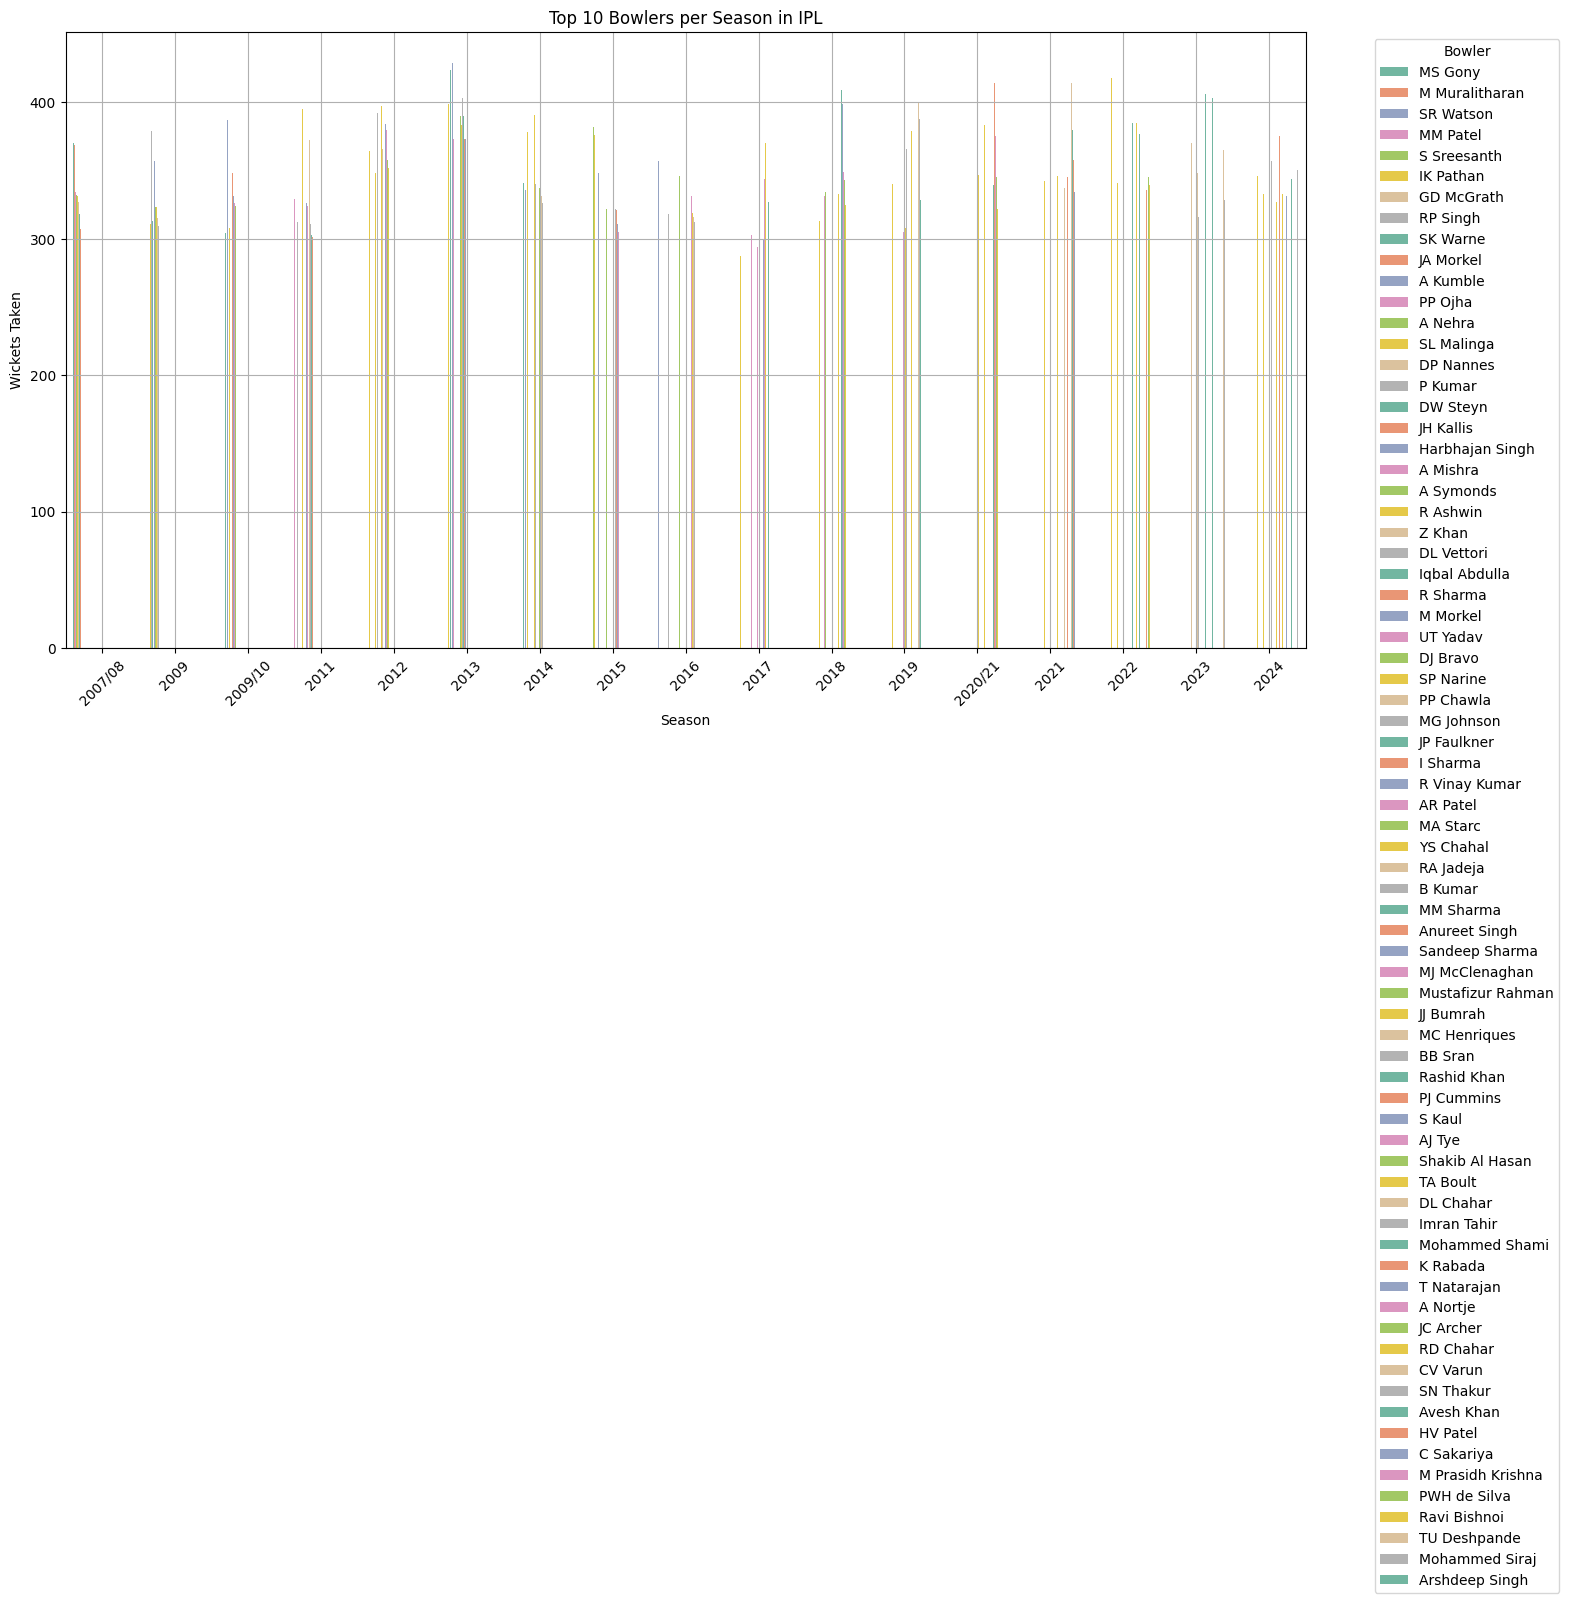

       season          bowler  player_dismissed
51    2007/08         MS Gony               370
46    2007/08  M Muralitharan               369
79    2007/08       SR Watson               341
50    2007/08        MM Patel               334
68    2007/08     S Sreesanth               332
...       ...             ...               ...
1827     2024      Avesh Khan               344
1919     2024       SP Narine               333
1931     2024        TA Boult               333
1929     2024     T Natarajan               331
1848     2024       JJ Bumrah               327

[170 rows x 3 columns]


In [37]:
# Group by season and bowler to count total wickets
top_bowlers_per_season = valid_dismissals.groupby(['season', 'bowler'])['player_dismissed'].count().reset_index()

# Sort by season and descending order of wickets
top_bowlers_per_season = top_bowlers_per_season.sort_values(by=['season', 'player_dismissed'], ascending=[True, False])

# Select the top 10 wicket-takers per season
top_10_bowlers_per_season = top_bowlers_per_season.groupby('season').head(10)

# Plot the Top 10 Bowlers per Season
plt.figure(figsize=(16, 8))
sns.barplot(x='season', y='player_dismissed', hue='bowler', data=top_10_bowlers_per_season, palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Wickets Taken")
plt.title("Top 10 Bowlers per Season in IPL")
plt.legend(title="Bowler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Display the top 10 bowlers per season
print(top_10_bowlers_per_season[['season', 'bowler', 'player_dismissed']])



In [43]:
# Adjusting column names based on actual dataset
match_features = matches_df[['id', 'season', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result_margin', 'player_of_match']]

# Renaming for clarity
match_features.rename(columns={'id': 'match_id', 'margin': 'winning_margin'}, inplace=True)

# Display first few rows
print(match_features.head())


   match_id   season                                       venue  \
0    335982  2007/08                       M Chinnaswamy Stadium   
1    335983  2007/08  Punjab Cricket Association Stadium, Mohali   
2    335984  2007/08                            Feroz Shah Kotla   
3    335985  2007/08                            Wankhede Stadium   
4    335986  2007/08                                Eden Gardens   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chen

<ipython-input-43-895087fc09bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_features.rename(columns={'id': 'match_id', 'margin': 'winning_margin'}, inplace=True)


In [45]:
# Selecting relevant columns from matches dataset
match_features = matches_df[['id', 'season', 'venue', 'team1', 'team2', 'toss_winner',
                             'toss_decision', 'winner', 'result_margin', 'player_of_match']]

# Renaming columns for better readability
match_features.rename(columns={'id': 'match_id', 'result_margin': 'winning_margin'}, inplace=True)

# Display first few rows
print(match_features.head())



   match_id   season                                       venue  \
0    335982  2007/08                       M Chinnaswamy Stadium   
1    335983  2007/08  Punjab Cricket Association Stadium, Mohali   
2    335984  2007/08                            Feroz Shah Kotla   
3    335985  2007/08                            Wankhede Stadium   
4    335986  2007/08                                Eden Gardens   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chen

<ipython-input-45-80c83f8d134e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_features.rename(columns={'id': 'match_id', 'result_margin': 'winning_margin'}, inplace=True)


In [46]:
# Check for missing values
print(match_features.isnull().sum())

# Fill missing values (if needed)
match_features.fillna({'winner': 'No Result', 'player_of_match': 'No Award'}, inplace=True)


match_id           0
season             0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
winning_margin     0
player_of_match    0
dtype: int64


<ipython-input-46-9101a6540d31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_features.fillna({'winner': 'No Result', 'player_of_match': 'No Award'}, inplace=True)


In [55]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
label_encoders = {}
categorical_columns = ['venue', 'team1', 'team2', 'toss_winner', 'winner', 'toss_decision', 'season'] # Added 'season' to categorical_columns

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    # Convert the column to string type before encoding
    match_features[col] = match_features[col].astype(str)  # This line is added
    match_features[col] = label_encoders[col].fit_transform(match_features[col])

print(match_features.head())  # Check transformed dataset

   match_id  season  venue  team1  team2  toss_winner  toss_decision  winner  \
0    335982       0     56      9     18            9              1      11   
1    335983       0     22     16      0            0              0       1   
2    335984       0     52     13      6            6              0       6   
3    335985       0     42      3      9            3              0      19   
4    335986       0     50     18      1            1              0      11   

   winning_margin player_of_match  home_advantage  toss_impact  \
0           140.0     BB McCullum               0            0   
1            33.0      MEK Hussey               0            0   
2             9.0     MF Maharoof               0            0   
3             5.0      MV Boucher               0            0   
4             5.0       DJ Hussey               0            0   

   important_match  
0                0  
1                0  
2                0  
3                0  
4                

<ipython-input-55-aaa887b554d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_features[col] = match_features[col].astype(str)  # This line is added
<ipython-input-55-aaa887b554d8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_features[col] = label_encoders[col].fit_transform(match_features[col])
<ipython-input-55-aaa887b554d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [68]:
from sklearn.preprocessing import OrdinalEncoder

# Identify categorical columns
categorical_columns = ['venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'player_of_match']

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# Fit on training data and transform both training and test data
X_train[categorical_columns] = ordinal_encoder.fit_transform(X_train[categorical_columns])
X_test[categorical_columns] = ordinal_encoder.transform(X_test[categorical_columns])  # Handles unseen labels

# Verify encoding
print(X_train.head())


     season  venue  team1  team2  toss_winner  toss_decision  winning_margin  \
737       3    2.0    9.0   16.0         16.0            1.0            17.0   
402      13   40.0    9.0    3.0          9.0            1.0             7.0   
897       6    4.0    0.0    9.0          9.0            1.0            23.0   
396      12   50.0    3.0    6.0          6.0            0.0             4.0   
846       5   44.0    9.0   18.0          9.0            0.0             9.0   

     player_of_match  home_advantage  toss_impact  important_match  
737             11.0               0            0                0  
402            171.0               0            0                0  
897            210.0               0            0                0  
396             75.0               0            0                0  
846             47.0               0            0                0  


In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [70]:
rf_predictions = rf_model.predict(X_test)


In [71]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, rf_predictions)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.57


Model Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.54      0.78      0.64        27
           2       0.00      0.00      0.00         1
           3       0.55      0.61      0.58        18
           4       0.25      0.33      0.29         6
           5       0.60      0.60      0.60        10
           6       0.67      0.62      0.64        13
           7       0.00      0.00      0.00         3
           8       1.00      0.33      0.50         6
           9       0.53      0.50      0.51        18
          10       0.00      0.00      0.00         1
          11       0.58      0.85      0.69        26
          12       1.00      0.20      0.33         5
          13       0.58      0.66      0.61        29
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.52      0.55   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


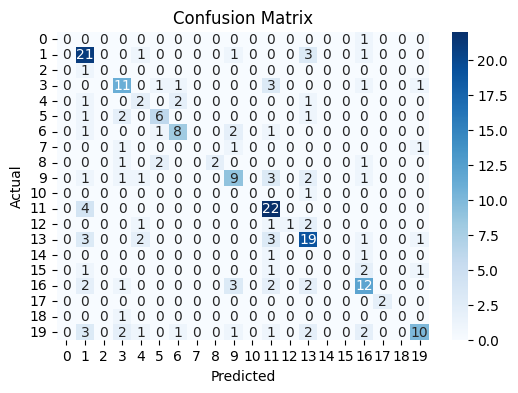

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on test data
rf_predictions = rf_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [74]:
# Ensure all required features exist in ipl_2025_matches
missing_features = set(X_train.columns) - set(ipl_2025_matches.columns)
for feature in missing_features:
    ipl_2025_matches[feature] = 0  # Assigning default value (modify if needed)

# Ensure column order matches training data
ipl_2025_matches = ipl_2025_matches[X_train.columns]

# Make Predictions
ipl_2025_predictions = rf_model.predict(ipl_2025_matches)

print(f"Predicted Winner: {ipl_2025_predictions[0]}")


Predicted Winner: 1


In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on test set
y_pred = rf_model.predict(X_test)

# Model Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.57

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.54      0.78      0.64        27
           2       0.00      0.00      0.00         1
           3       0.55      0.61      0.58        18
           4       0.25      0.33      0.29         6
           5       0.60      0.60      0.60        10
           6       0.67      0.62      0.64        13
           7       0.00      0.00      0.00         3
           8       1.00      0.33      0.50         6
           9       0.53      0.50      0.51        18
          10       0.00      0.00      0.00         1
          11       0.58      0.85      0.69        26
          12       1.00      0.20      0.33         5
          13       0.58      0.66      0.61        29
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.52      0.55  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


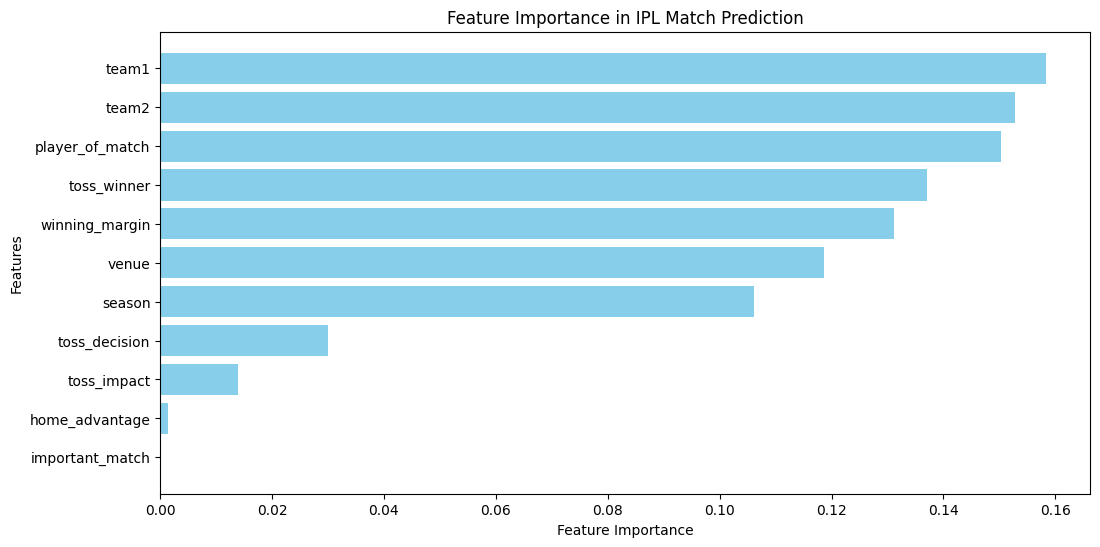

           Feature  Importance
2            team1    0.158316
3            team2    0.152712
7  player_of_match    0.150258
4      toss_winner    0.137090
6   winning_margin    0.131245
1            venue    0.118746
0           season    0.106236
5    toss_decision    0.030027
9      toss_impact    0.013961
8   home_advantage    0.001409


In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from RandomForest
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in IPL Match Prediction")
plt.gca().invert_yaxis()
plt.show()

# Display top features
print(features_df.head(10))


In [77]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Predictions using optimized model
rf_predictions_best = rf_best.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [80]:
# Ensure we use the same feature set that was used for training
selected_features = X_train.columns  # Extract the feature names from training data

# Display the selected features
print("Selected Features for Prediction:", list(selected_features))


Selected Features for Prediction: ['season', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winning_margin', 'player_of_match', 'home_advantage', 'toss_impact', 'important_match']


In [83]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [84]:
ipl_2025_predictions = rf_model.predict(ipl_2025_matches)


In [87]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Model
rf_model_best = grid_search.best_estimator_

# Now predict using rf_model_best
ipl_2025_predictions = rf_model_best.predict(ipl_2025_matches)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [88]:
# Ensure IPL 2025 match data has the same features as training data
ipl_2025_matches = ipl_2025_matches[selected_features]  # Select only required features

# Make Predictions
ipl_2025_predictions = rf_model_best.predict(ipl_2025_matches)

# Add predictions to dataset
ipl_2025_matches["Predicted Winner"] = ipl_2025_predictions

# Display results
print("Predicted Match Outcomes for IPL 2025:")
print(ipl_2025_matches[['team1', 'team2', 'Predicted Winner']])


Predicted Match Outcomes for IPL 2025:
   team1  team2  Predicted Winner
0   -1.0   -1.0                 1


In [89]:
# Ensure IPL 2025 match data has the same features as training data
ipl_2025_matches = ipl_2025_matches[selected_features]  # Select only required features

# Make Predictions
ipl_2025_predictions = rf_model_best.predict(ipl_2025_matches)

# Add predictions to dataset
ipl_2025_matches["Predicted Winner"] = ipl_2025_predictions

# Display results
print("Predicted Match Outcomes for IPL 2025:")
print(ipl_2025_matches[['team1', 'team2', 'Predicted Winner']])


Predicted Match Outcomes for IPL 2025:
   team1  team2  Predicted Winner
0   -1.0   -1.0                 1


In [90]:
# Ensure feature names match those used in training
selected_features = X_train.columns.tolist()  # Extract feature names from training data
ipl_2025_matches = ipl_2025_matches[selected_features]  # Select only required features

# Make Predictions
ipl_2025_predictions = rf_model_best.predict(ipl_2025_matches)

print("Predicted Match Outcomes for IPL 2025:")
print(ipl_2025_predictions)


Predicted Match Outcomes for IPL 2025:
[1]


In [91]:
from sklearn.metrics import accuracy_score, classification_report

print("Model Accuracy:", accuracy_score(y_test, rf_model_best.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, rf_model_best.predict(X_test)))


Model Accuracy: 0.5844748858447488
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.58      0.81      0.68        27
           2       0.00      0.00      0.00         1
           3       0.58      0.61      0.59        18
           4       0.29      0.33      0.31         6
           5       0.60      0.60      0.60        10
           6       0.70      0.54      0.61        13
           7       0.00      0.00      0.00         3
           8       0.67      0.33      0.44         6
           9       0.61      0.61      0.61        18
          10       0.00      0.00      0.00         1
          11       0.54      0.85      0.66        26
          12       1.00      0.20      0.33         5
          13       0.61      0.69      0.65        29
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.5

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


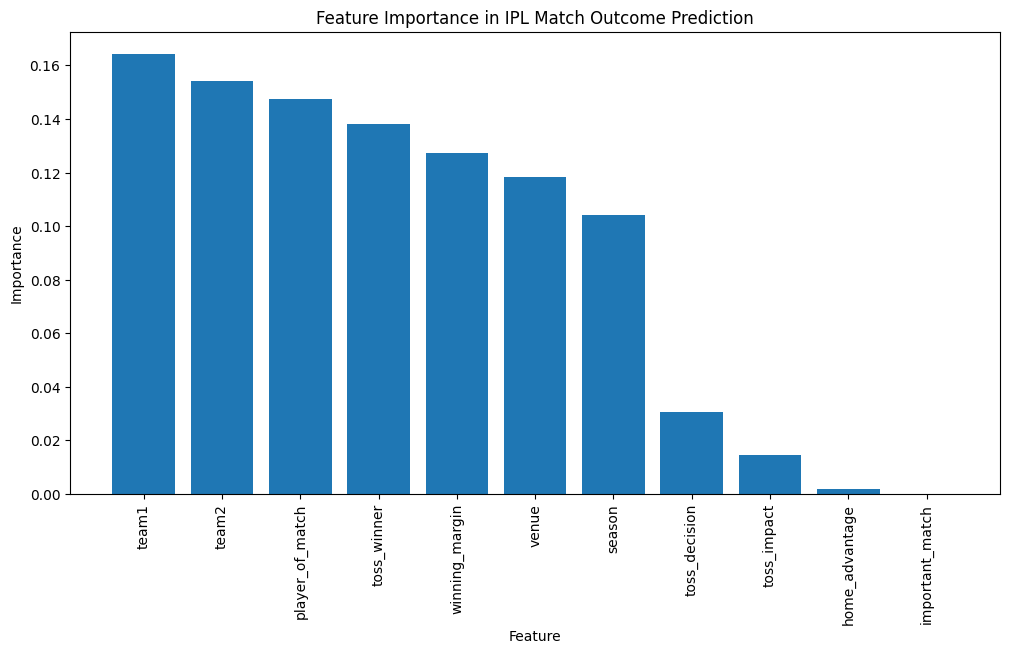

In [92]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = rf_model_best.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align="center")
plt.xticks(range(len(feature_importance)), np.array(selected_features)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in IPL Match Outcome Prediction")
plt.show()


In [93]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
rf_model_best = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [94]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on test data
y_pred = rf_model_best.predict(X_test)

# Print accuracy and classification report
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Optimized Model Accuracy: 0.5799086757990868
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.55      0.81      0.66        27
           2       0.00      0.00      0.00         1
           3       0.58      0.61      0.59        18
           4       0.29      0.33      0.31         6
           5       0.60      0.60      0.60        10
           6       0.73      0.62      0.67        13
           7       0.00      0.00      0.00         3
           8       0.67      0.33      0.44         6
           9       0.62      0.56      0.59        18
          10       0.00      0.00      0.00         1
          11       0.54      0.85      0.66        26
          12       1.00      0.20      0.33         5
          13       0.59      0.66      0.62        29
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
# Ensure IPL 2025 match data has the same features as training data
ipl_2025_matches = ipl_2025_matches[selected_features]

# Make Predictions
ipl_2025_predictions = rf_model_best.predict(ipl_2025_matches)

# Display Predictions
print("Predicted Match Outcomes for IPL 2025:")
print(ipl_2025_predictions)


Predicted Match Outcomes for IPL 2025:
[1]


<ipython-input-96-237b394b96de>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Match', y='Predicted Winner', data=ipl_2025_results, palette="coolwarm")


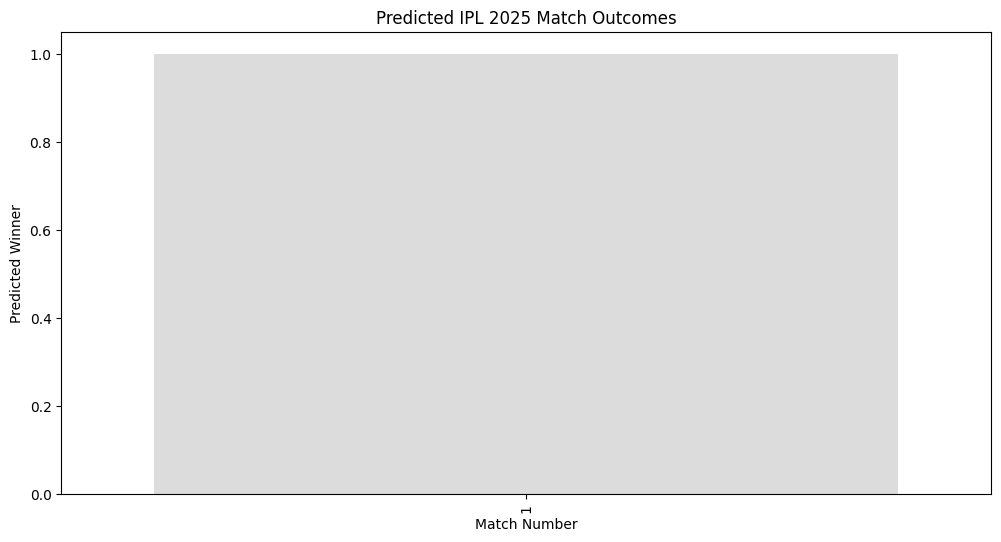

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert predictions to DataFrame for visualization
ipl_2025_results = pd.DataFrame({'Match': range(1, len(ipl_2025_predictions) + 1), 'Predicted Winner': ipl_2025_predictions})

# Plot Results
plt.figure(figsize=(12, 6))
sns.barplot(x='Match', y='Predicted Winner', data=ipl_2025_results, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Match Number")
plt.ylabel("Predicted Winner")
plt.title("Predicted IPL 2025 Match Outcomes")
plt.show()
